In [122]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error


#read data into data frame
df = pd.read_csv("Fish.csv")


In [123]:
#Cleaning data before analysis
df.describe()

#Drop rows where any value is 0
#Replace 0 with NaN
df = df.replace(0, np.nan)
#Drop all NaN
df = df.dropna()

# if there are duplicate values, drop them
df.drop_duplicates(inplace = True)



Testing data amount 48
Training data amount 110


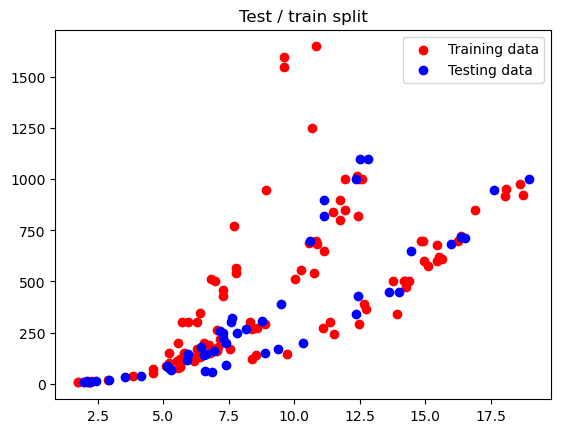

In [124]:
#1 Randomly split dataset with 70/30 training and test dataset
#if another feature should be used to predict the Weight, change "independent"
independent = df.Height

X_train, X_test, y_train, y_test = train_test_split(independent, df.Weight, test_size=0.30)

# train = data that will be used to train the regressor, test = data that will be used to test the regressor based on "rules" learned on training data

print("Testing data amount", len(X_test.index))
print("Training data amount", len(X_train.index))

plt.scatter(X_train, y_train, label="Training data", color="r")
plt.scatter(X_test, y_test, label="Testing data", color="b")
plt.legend()
plt.title("Test / train split")
plt.show()
#Split into y (weight, predicted values) and x (features e.g. Height)



In [125]:
#Regression with Random forest model
rfr = RandomForestRegressor()
# Fit the random forrest regressor to our training data
rfr.fit(X_train.values.reshape(-1,1), y_train.values)
# Use the random forrest regressor to predict outputs for our test data
rfrPrediction = rfr.predict(X_test.values.reshape(-1,1))



In [126]:
#Linear Regression
lr = LinearRegression()
# Fit the linear  regressor to our training data
lr.fit(X_train.values.reshape(-1,1), y_train.values)
# Use the linear regressor to predict outputs for our test data
lrPrediction = lr.predict(X_test.values.reshape(-1,1))

In [127]:
#3 calculate RMSE and R2 in the test set
lrRMSE = mean_squared_error(y_test.values, lrPrediction, squared=False)
rfrRMSE = mean_squared_error(y_test.values, rfrPrediction, squared=False)

print(lrRMSE, rfrRMSE)

lrR2 = lr.score(X_test.values.reshape(-1,1),y_test.values)
rfrR2 = rfr.score(X_test.values.reshape(-1,1),y_test.values)

print(lrR2,rfrR2)


190.49666460618465 311.3422928270227
0.6600668905324149 0.09198096344254014


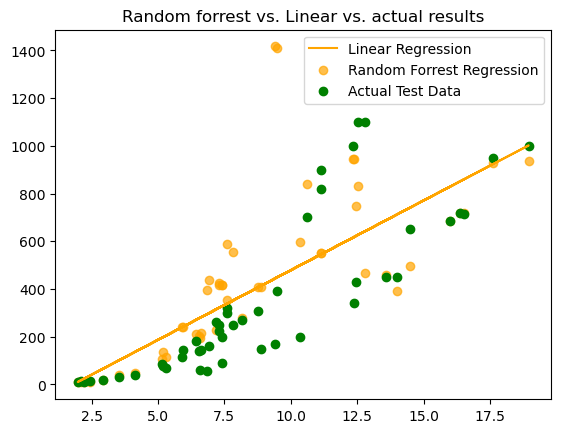

In [128]:
#4 Visualized the predictions and compare the method (y_pred vs y_test)

#plot lr  prediction
plt.plot(X_test, lrPrediction, label="Linear Regression", color="orange")

#plot rfr prediction
plt.scatter(X_test, rfrPrediction, label="Random Forrest Regression", color="orange", alpha=0.7)

#plot actual data
plt.scatter(X_test, y_test, label="Actual Test Data", color="green")

plt.legend()
plt.title("Random forrest vs. Linear vs. actual results")
plt.show()

In [129]:
#Task 2
#5. Change the training-test split setting, with the 70/30 principle for each species. 
# #That means, in any of the species, there needs to be 70% of the sample in the training set, and 30% of the sample in the test set.




In [130]:
#6. Redo step 2,3,4 in Task1
# 2: Use linear regression, random forest model

#3: calculate RMSE and R2 in the test set

#4:Visualized the predictions and compare the method (y_pred vs y_test)



In [131]:
#Compare the results in task1 and task2
